In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]

from tqdm import tqdm

# Define domain
dx = 1e-6
L = np.pi
x = L*np.arange(-1+dx,1+dx,dx)
n = len(x)

2000000


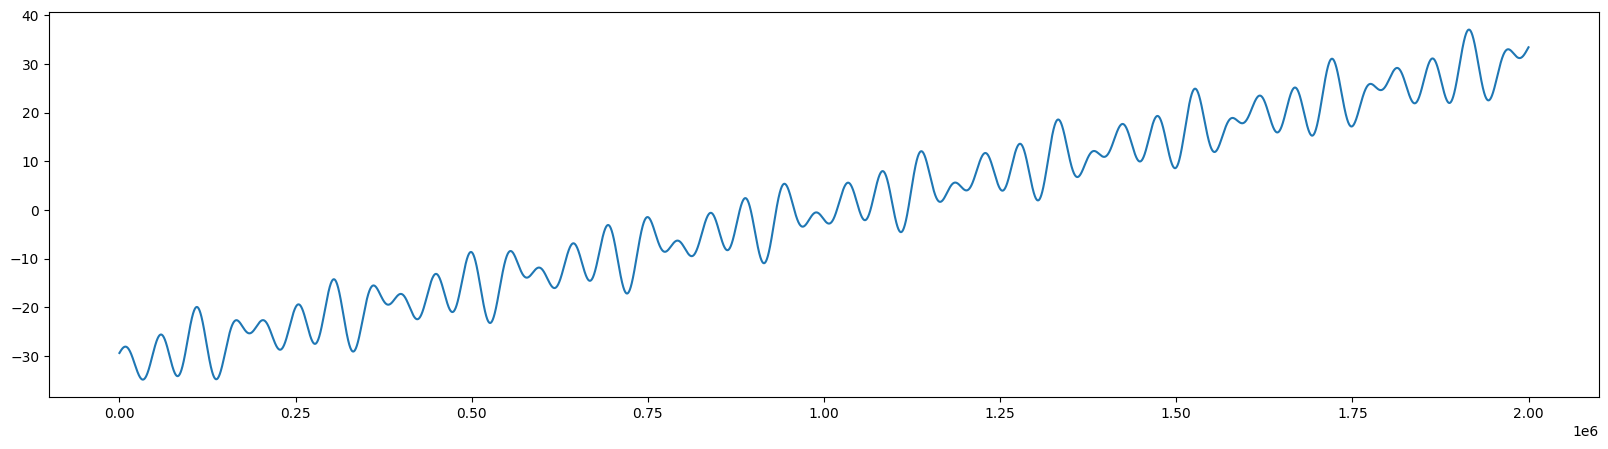

In [17]:
# Define f function
original = 0
original += x*10
original += -2*np.cos(21*x)
original += 3*np.sin(31*x)
original += -4*np.sin(41*x)


print(len(original))
plt.plot(original)

In [18]:
fft_output = np.fft.fft(original)
len(fft_output)

2000000

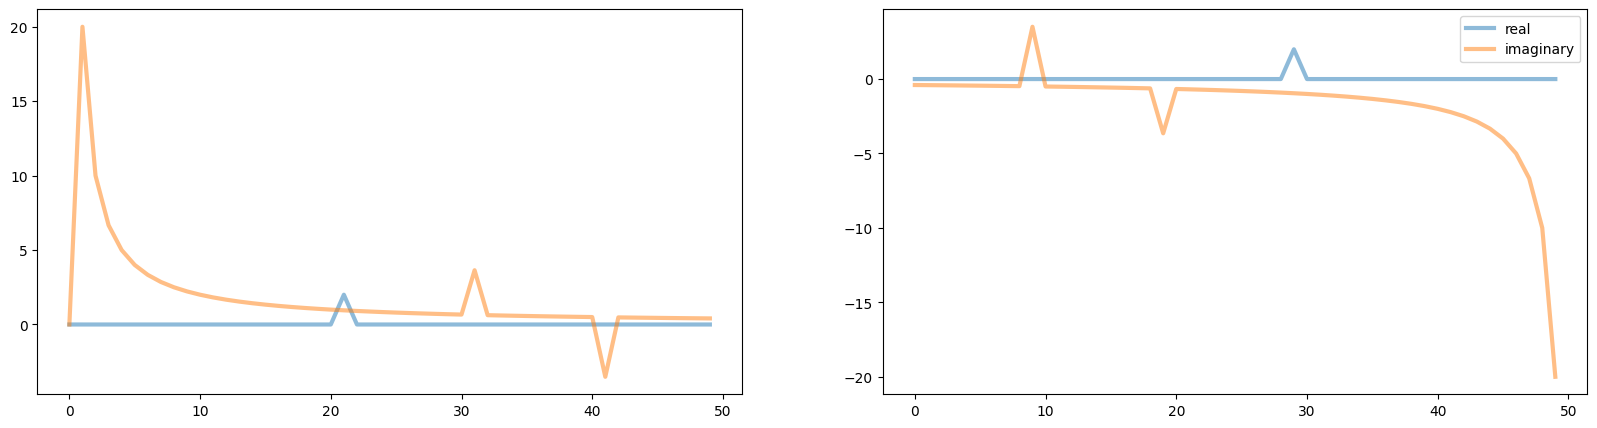

In [19]:
re = fft_output.real/ len(fft_output)*2
im = fft_output.imag/ len(fft_output)*2



plt.subplot(1, 2, 1)
plt.plot(re[:50], linewidth = 3, alpha = 0.5, label = 'real')
plt.plot(im[:50], linewidth = 3, alpha = 0.5, label = 'imaginary')

plt.subplot(1, 2, 2)
plt.plot(re[-50:], linewidth = 3, alpha = 0.5, label = 'real')
plt.plot(im[-50:], linewidth = 3, alpha = 0.5, label = 'imaginary')
plt.legend()

In [22]:
re_list = [(idx,i) for idx,i in enumerate(re) if i > .1]
im_list = [(idx,i) for idx,i in enumerate(im) if i > .1]

from tqdm import tqdm
retrieve = 0
for val, idx in tqdm(re_list):
    retrieve += -np.cos(x*val)*idx
    
for val, idx in tqdm(im_list):
    retrieve += np.sin(x*val)*idx

100%|██████████| 199/199 [00:05<00:00, 34.76it/s]


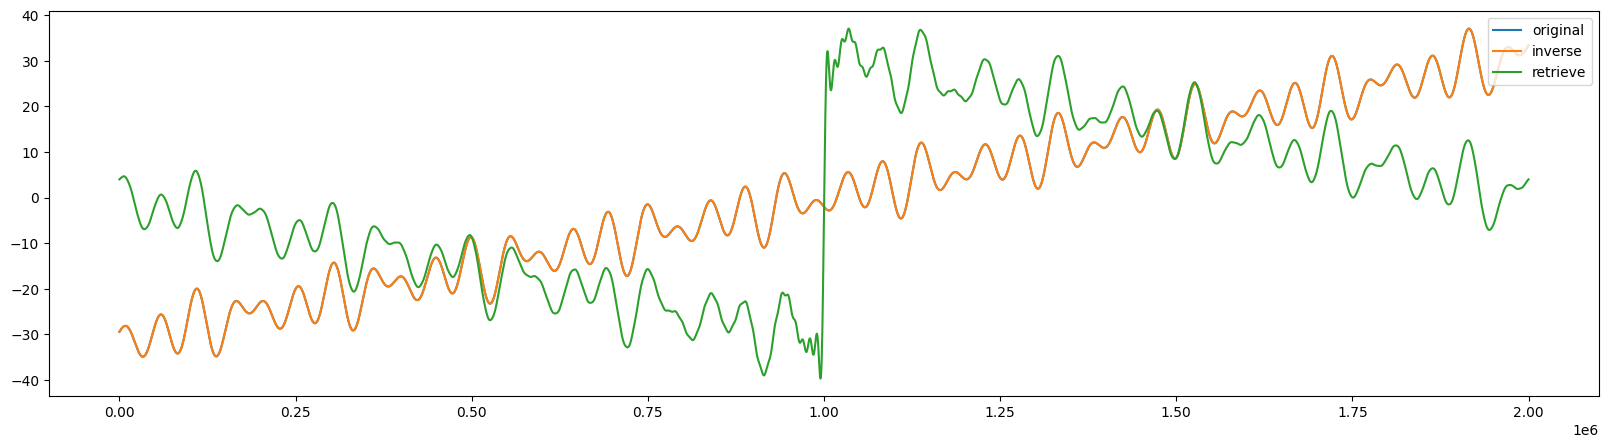

In [23]:
plt.plot(original, label = 'original')
plt.plot(np.fft.ifft(fft_output), label = 'inverse')
plt.plot(retrieve, label = 'retrieve')
plt.legend(loc = 'upper right')